In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Cleaning

In [2]:
df = pd.read_csv('./dataset/mobile.csv')

In [3]:
df.head()

,Name,Spec Score,rating,price,img,tag,sim,processor,storage,battery,display,camera,memoryExternal,version,fm
0,OPPO Reno 14 Pro 5G,89,4.65,41990,https://cdn1.smartprix.com/rx-is822PXo3-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8450, Octa Core, 3.25 GHz Processor","12 GB RAM, 256 GB inbuilt",6200 mAh Battery with 80W Fast Charging,"6.83 inches, 1272 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,NaN,Android v15,No FM Radio
1,OPPO Reno 14 5G,87,4.75,32990,https://cdn1.smartprix.com/rx-iRGgfcGDH-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8350, Octa Core, 3.35 GHz Processor","8 GB RAM, 256 GB inbuilt",6000 mAh Battery with 80W Fast Charging,"6.59 inches, 1256 x 2760 px, 120 Hz Display wi...",50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...,NaN,Android v15,No FM Radio
2,Poco F7 5G,83,4.75,31999,https://cdn1.smartprix.com/rx-icmgBU9Q2-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",7550 mAh Battery with 90W Fast Charging,"6.83 inches, 1280 x 2772 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 20 MP Front Camera,Memory Card Not Supported,Android v15,NaN
3,Vivo X200 FE,89,4.65,49990,https://cdn1.smartprix.com/rx-iHI7IaQgQ-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...","12 GB RAM, 256 GB inbuilt",6500 mAh Battery with 90W Fast Charging,"6.31 inches, 1216 x 2640 px, 120 Hz Display wi...",50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...,Memory Card Not Supported,Android v15,NaN
4,OPPO K13x 5G,73,4.20,11999,https://cdn1.smartprix.com/rx-iXUulomIY-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6300, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 45W Fast Charging,"6.67 inches, 720 x 1604 px, 120 Hz Display wit...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 2 TB",Android v15,NaN


In [4]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64

In [5]:
df.describe()

,Spec Score,rating,price
count,1019.000000,1019.000000,1019.000000
mean,78.513248,4.377380,35006.714426
std,12.754081,0.234293,40671.714570
min,7.000000,3.450000,99.000000
25%,75.000000,4.150000,13999.000000
50%,81.000000,4.400000,23498.000000
75%,85.000000,4.600000,39990.000000
max,96.000000,4.750000,489990.000000


## Handling Outliers

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Spec Score', 'rating', 'price']


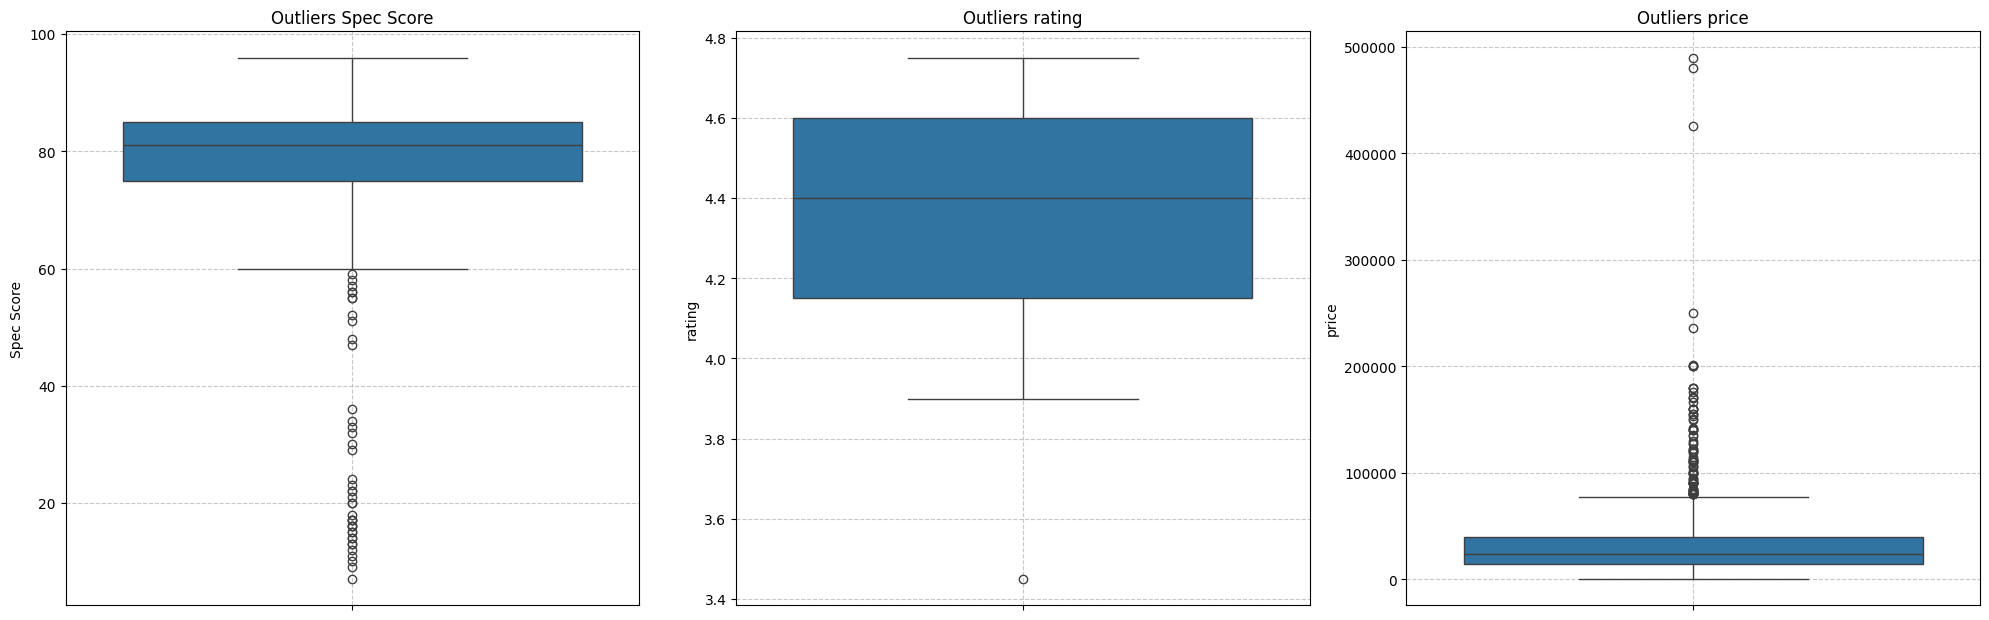

In [7]:
num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots+num_cols-1)

plt.figure(figsize=(num_rows*4, num_cols *10))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [8]:
# Spec Score
q1 = np.percentile(df['Spec Score'], 25)
q3 = np.percentile(df['Spec Score'], 75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_list = [x for x in df['Spec Score'] if x < lower_bound or x > upper_bound]
print(f"\nOutliers (IQR method - List):\n{outliers_list}")


Outliers (IQR method - List):
[36, 29, 23, 58, 7, 9, 24, 55, 20, 32, 14, 59, 22, 56, 11, 57, 33, 16, 15, 21, 22, 20, 51, 48, 52, 16, 17, 13, 34, 55, 17, 30, 14, 13, 10, 16, 56, 47, 18, 12, 17, 15]


In [9]:
print(f'Upper Bound: {upper_bound}')
print(f'Lower Bound: {lower_bound}')
print(f'IQR: {iqr}')
print(f'Quartile 1: {q1}')
print(f'Quartile 3: {q3}')

Upper Bound: 100.0
Lower Bound: 60.0
IQR: 10.0
Quartile 1: 75.0
Quartile 3: 85.0


In [10]:
df['Spec Score'] = np.where(df['Spec Score'] < lower_bound, lower_bound, df['Spec Score'])

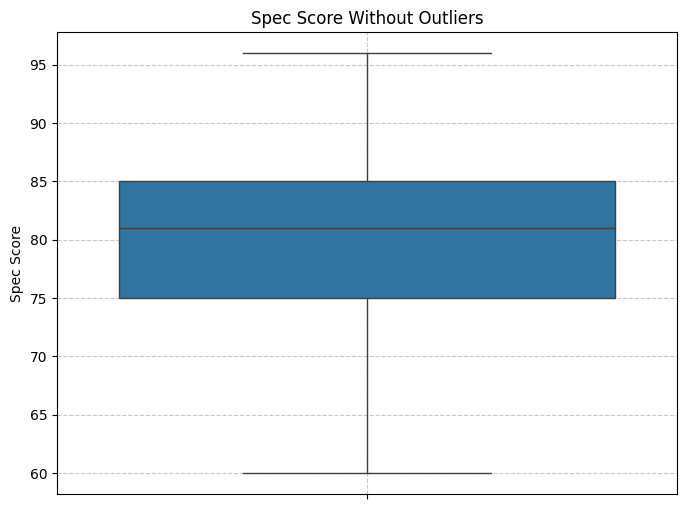

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Spec Score'])
plt.title('Spec Score Without Outliers')
plt.ylabel('Spec Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

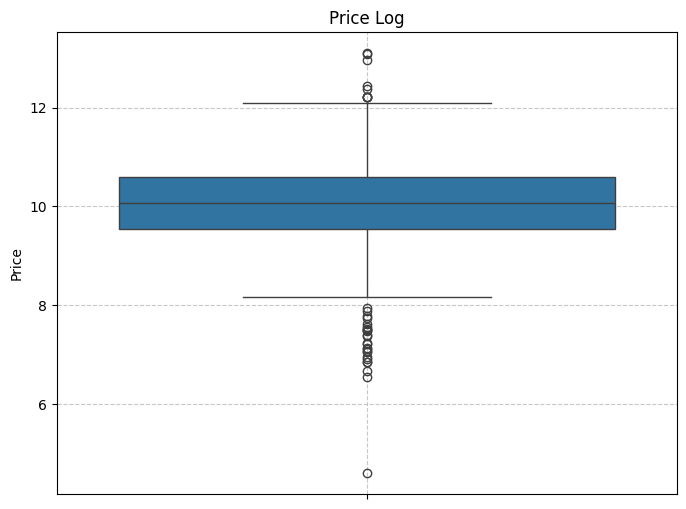

In [12]:
# Price
df['price_log'] = np.log1p(df['price'])

plt.figure(figsize=(8,6))
sns.boxplot(y=df['price_log'])
plt.title("Price Log")
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
price_log           0
dtype: int64

In [14]:
df.drop(columns=['fm'], inplace=True)

In [15]:
df['storage'] = df['storage'].fillna('Unknown')
df['processor'] = df['processor'].fillna('Unknown')
df['memoryExternal'] = df['memoryExternal'].fillna('Unknown')
df['battery'] = df['battery'].fillna('Unknown') 
df['display'] = df['display'].fillna('Unknown')
df['camera'] = df['camera'].fillna('Unknown')
df['version'] = df['version'].fillna('Unknown') 

In [16]:
df.isnull().sum()

Name              0
Spec Score        0
rating            0
price             0
img               0
tag               0
sim               0
processor         0
storage           0
battery           0
display           0
camera            0
memoryExternal    0
version           0
price_log         0
dtype: int64

## Exploratory Data Analysis

Since we're gonna do a prediction model, let's take a look for the correlation between each variable

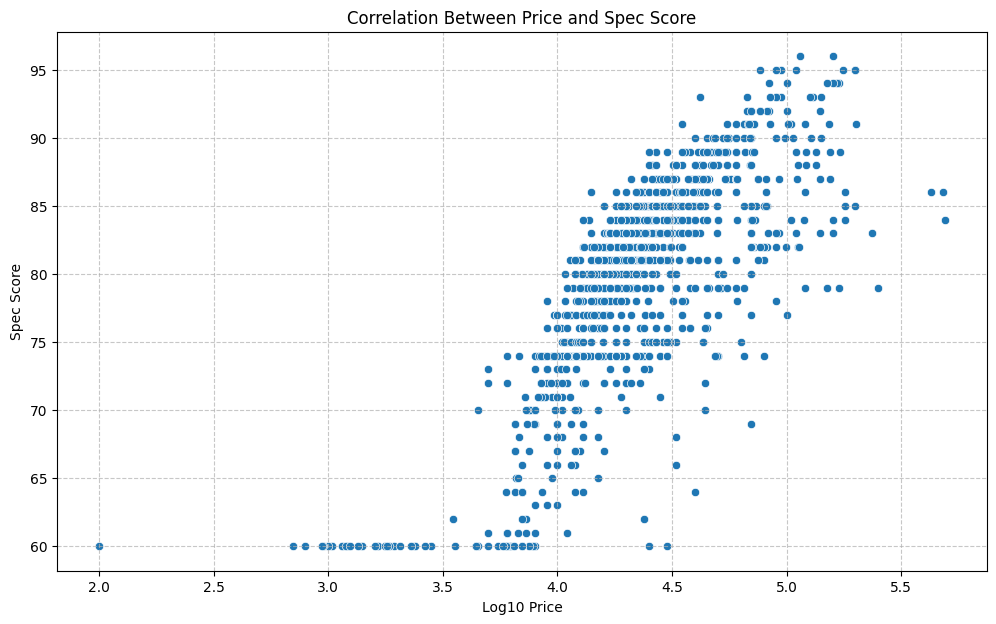

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(df, x=np.log10(df['price']+1), y='Spec Score')
plt.title('Correlation Between Price and Spec Score')
plt.xlabel('Log10 Price')
plt.ylabel('Spec Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We can observe from the following picture that there is a positive and generally linear relationship between Spec Score and Price.  In order to reduce the accumulation of the lower data and make it appear clear and instructive, I also perform a logarithmic modification. The top right patterns indicate that a higher spec-score is always associated with a higher price.  Additionally, some pricing clusters with more constrained spec score varieties indicate distinct market sectors (e.g., entry-level, mid-range, and high-end).  These dots on the bottom left provide confirmation of the detected outliers, indicating that the product is being offered with fewer specifications, potentially resulting in a lower price.

In [18]:
def extract_processor_brand(processor_name):
    processor_name = processor_name.lower()
    if 'snapdragon' in processor_name: return 'Snapdragon'
    elif 'dimensity' in processor_name: return 'Dimensity'
    elif 'helio' in processor_name: return 'Helio'
    elif 'exynos' in processor_name: return 'Exynos'
    elif 'a series' in processor_name or 'apple' in processor_name or 'bionic' in processor_name: return 'Apple A Series'
    elif 'kirin' in processor_name: return 'Kirin'
    elif 'mediatek' in processor_name: return 'MediaTek (General)'
    elif 'unisoc' in processor_name: return 'Unisoc'
    elif 'intel' in processor_name: return 'Intel'
    else: return 'Other/Unknown Processor Brand'

In [19]:
df['Processor_Brand'] = df['processor'].apply(extract_processor_brand)

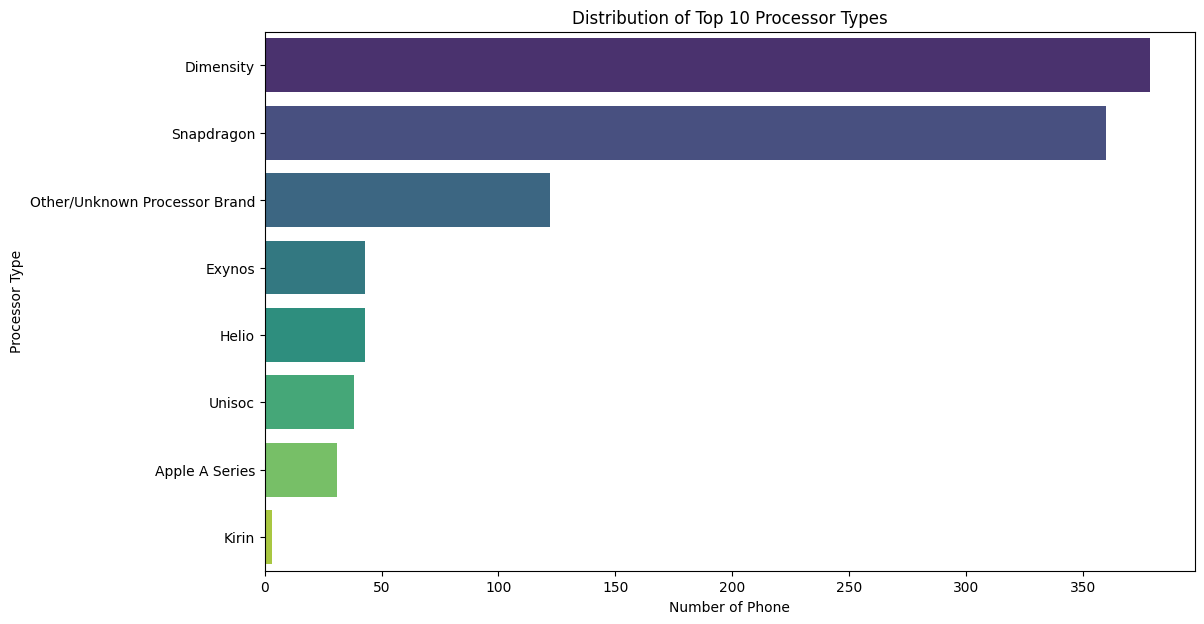

In [20]:
top_n_processors = df['Processor_Brand'].value_counts().head(10)
plt.figure(figsize=(12,7))
sns.barplot(x=top_n_processors.values, y=top_n_processors.index, palette='viridis')
plt.title('Distribution of Top 10 Processor Types')
plt.xlabel('Number of Phone')
plt.ylabel('Processor Type')
plt.show()

## Tag Phone Counts

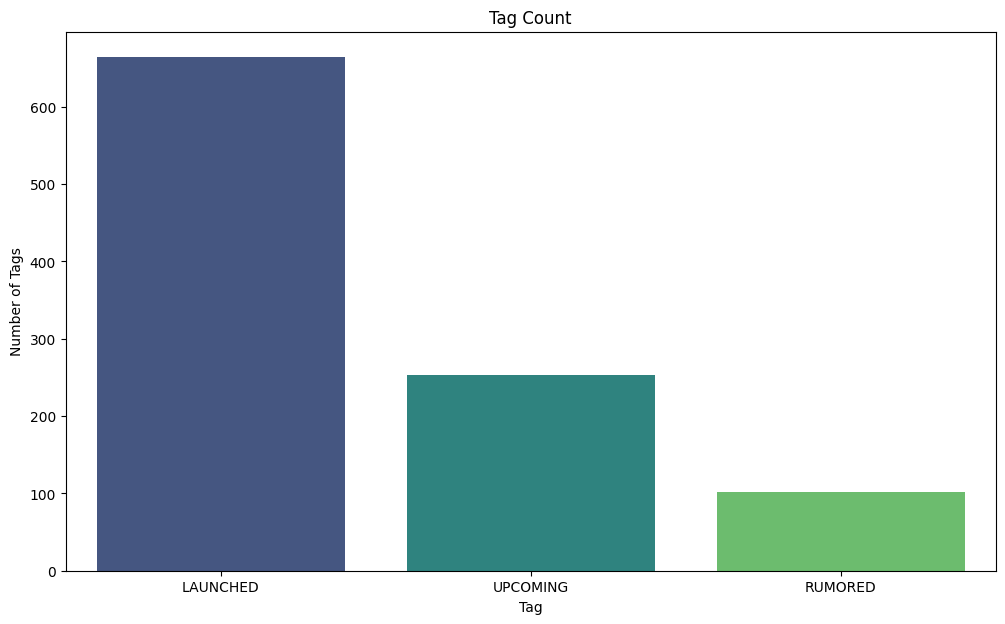

In [21]:
tag_counts = df['tag'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='viridis')
plt.title('Tag Count')
plt.xlabel('Tag')
plt.ylabel('Number of Tags')
plt.show()

## Price Distribution

In [22]:
df['price'].describe()

count      1019.000000
mean      35006.714426
std       40671.714570
min          99.000000
25%       13999.000000
50%       23498.000000
75%       39990.000000
max      489990.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of Phone Prices')

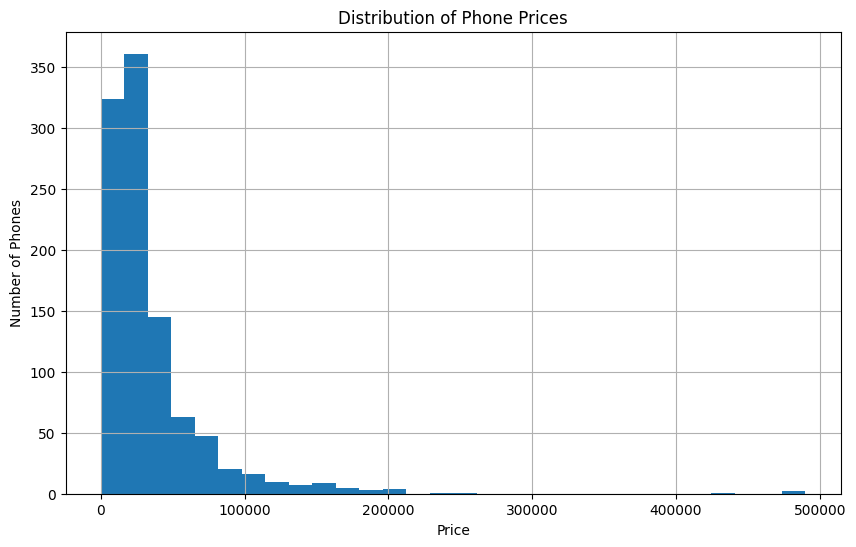

In [23]:
df['price'].hist(bins=30, figsize=(10,6))
plt.xlabel('Price')
plt.ylabel('Number of Phones')
plt.title('Distribution of Phone Prices')

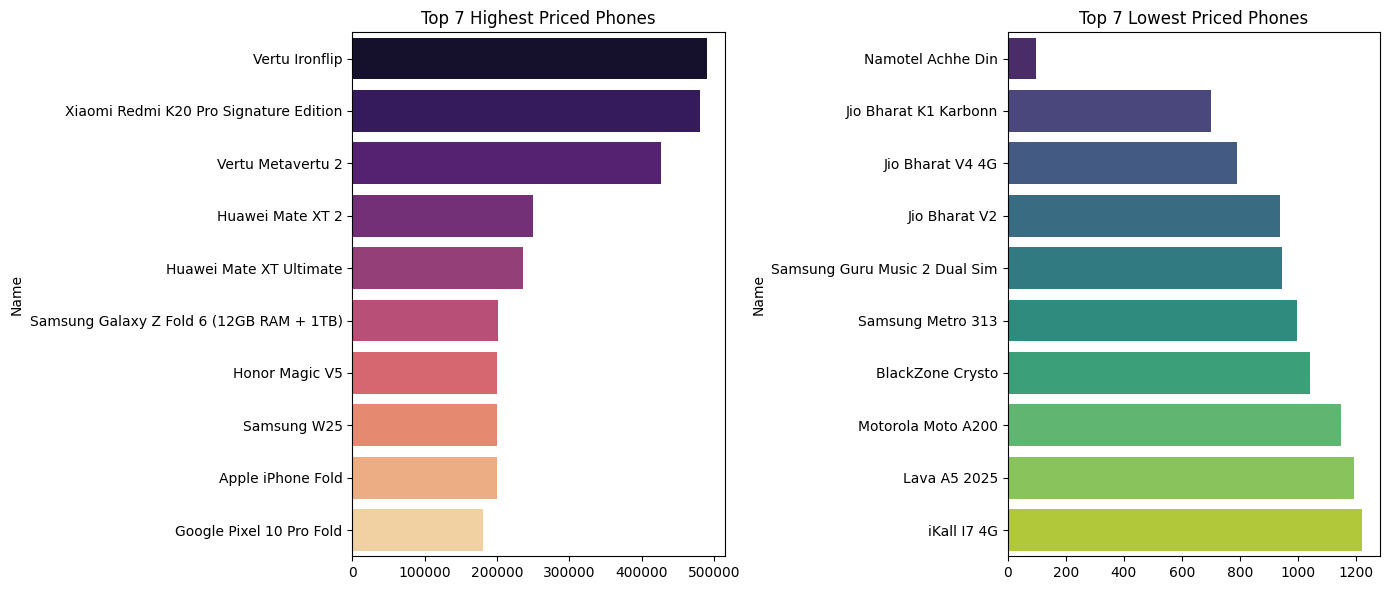

In [24]:
highest_price = df.nlargest(10, 'price')[['Name', 'price']].set_index('Name')['price']
lowest_price = df.nsmallest(10, 'price')[['Name', 'price']].set_index('Name')['price']

fig, ax= plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x=highest_price.values, y=highest_price.index, ax=ax[0], palette='magma')
ax[0].set_title('Top 7 Highest Priced Phones')
sns.barplot(x=lowest_price.values, y=lowest_price.index, ax=ax[1], palette='viridis')
ax[1].set_title('Top 7 Lowest Priced Phones')

plt.tight_layout()
plt.show()

## Is there any correlation between storage/ram with their prices?

In [25]:
df['storage'] = df['storage'].fillna('').str.lower()
df['ram_gb'] = df['storage'].str.extract(r'(\d+)\s*gb\s*ram').astype(float)
storage_match = df['storage'].str.extract(r',\s*(\d+)\s*(gb|tb)\s*inbuilt')

df['storage_gb'] = storage_match.apply(
    lambda row: float(row[0]) * (1024 if row[1] == 'tb' else 1) if pd.notnull(row[0]) else None,
    axis=1
)

In [26]:
df[['storage','ram_gb','storage_gb']].head(20)

,storage,ram_gb,storage_gb
0,"12 gb ram, 256 gb inbuilt",12.0,256.0
1,"8 gb ram, 256 gb inbuilt",8.0,256.0
2,"12 gb ram, 256 gb inbuilt",12.0,256.0
3,"12 gb ram, 256 gb inbuilt",12.0,256.0
4,"4 gb ram, 128 gb inbuilt",4.0,128.0
5,"8 gb ram, 128 gb inbuilt",8.0,128.0
6,"12 gb ram, 256 gb inbuilt",12.0,256.0
7,"4 gb ram, 128 gb inbuilt",4.0,128.0
8,"12 gb ram, 256 gb inbuilt",12.0,256.0
9,"6 gb ram, 128 gb inbuilt",6.0,128.0


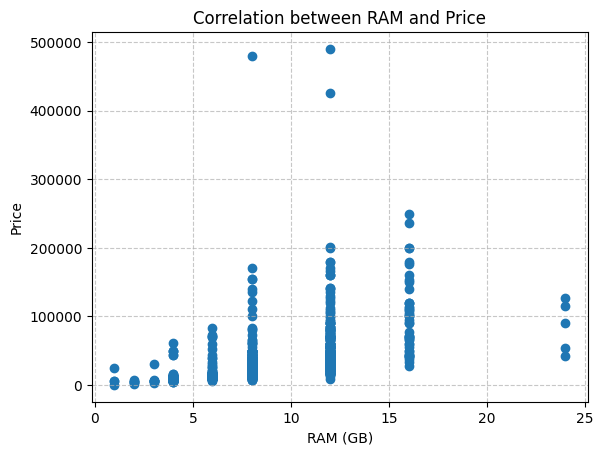

In [27]:
df[['ram_gb', 'price']].corr()

plt.scatter(df['ram_gb'], df['price'])
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('Correlation between RAM and Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

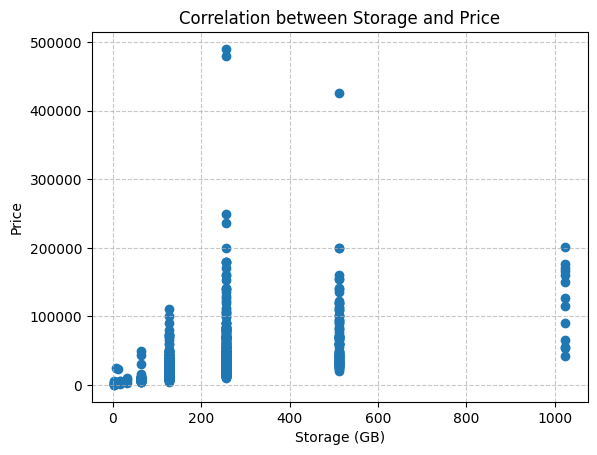

In [28]:
df[['storage_gb', 'price']].corr()

plt.scatter(df['storage_gb'], df['price'])
plt.xlabel('Storage (GB)')
plt.ylabel('Price')
plt.title('Correlation between Storage and Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [29]:
df.loc[df['ram_gb']>20, ['Name','ram_gb','storage_gb']].head(20)  

,Name,ram_gb,storage_gb
279,OnePlus 13 (24GB RAM+ 1TB),24.0,1024.0
835,Asus ROG Phone 9 Pro Edition,24.0,1024.0
849,OnePlus Ace 3 Pro (24GB RAM + 1TB),24.0,1024.0
888,Honor Magic 6 RSR,24.0,1024.0
913,Realme GT 5 (240W),24.0,1024.0


In [30]:
df.loc[df['storage_gb']>1000, ['Name','ram_gb','storage_gb']].head(20) 

,Name,ram_gb,storage_gb
279,OnePlus 13 (24GB RAM+ 1TB),24.0,1024.0
385,iQOO 13 5G (16GB RAM + 1TB),16.0,1024.0
454,Apple iPhone 16 Pro Max (1TB),8.0,1024.0
497,Samsung Galaxy S25 Ultra (12GB RAM + 1TB),12.0,1024.0
573,Redmi K80 Ultra,16.0,1024.0
584,Samsung Galaxy S24 Ultra (12GB RAM + 1TB),12.0,1024.0
705,Samsung Galaxy S25 Ultra (16GB RAM + 1TB),16.0,1024.0
737,Samsung Galaxy Z Fold 6 (12GB RAM + 1TB),12.0,1024.0
835,Asus ROG Phone 9 Pro Edition,24.0,1024.0
849,OnePlus Ace 3 Pro (24GB RAM + 1TB),24.0,1024.0


## How many features were mentioned in dataset?

In [31]:
df['sim'] = df['sim'].fillna('').str.lower()
df['no_sim'] = df['sim'].str.contains('no sim supported', na=False)
df['is_dual_sim'] = df['sim'].str.contains('dual', na=False)
df['sim_3g'] = df['sim'].str.contains('3g', na=False)
df['sim_4g'] = df['sim'].str.contains('4g', na=False)
df['sim_5g'] = df['sim'].str.contains('5g', na=False)
df['has_volte'] = df['sim'].str.contains('volte', na=False)
df['has_vo5g'] = df['sim'].str.contains('vo5g', na=False)
df['has_wifi'] = df['sim'].str.contains('wi-fi', na=False)
df['has_nfc'] = df['sim'].str.contains('nfc', na=False)
df['has_ir_blaster'] = df['sim'].str.contains('ir blaster', na=False)

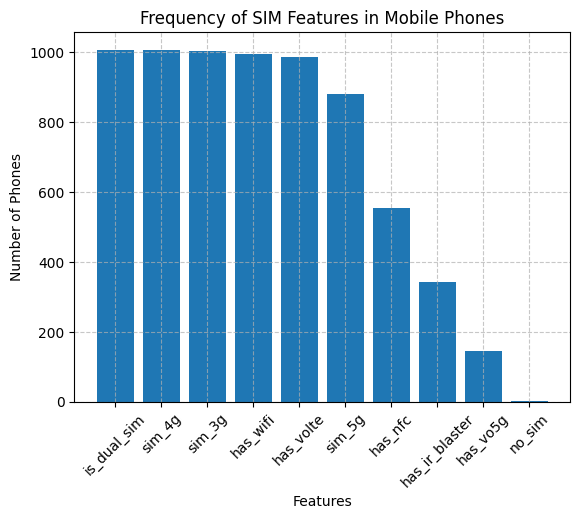

In [32]:
sim_features = [
    'no_sim', 'is_dual_sim', 'sim_3g', 'sim_4g', 'sim_5g',
    'has_volte', 'has_vo5g', 'has_wifi', 'has_nfc', 'has_ir_blaster'
]

df[sim_features].sum().sort_values(ascending=False)
(df[sim_features].mean().sort_values(ascending=False)) * 100

feature_counts = df[sim_features].sum().sort_values(ascending=False)
plt.bar(feature_counts.index, feature_counts.values)
plt.title('Frequency of SIM Features in Mobile Phones')
plt.xlabel('Features')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Distribution of Top 10 Brands


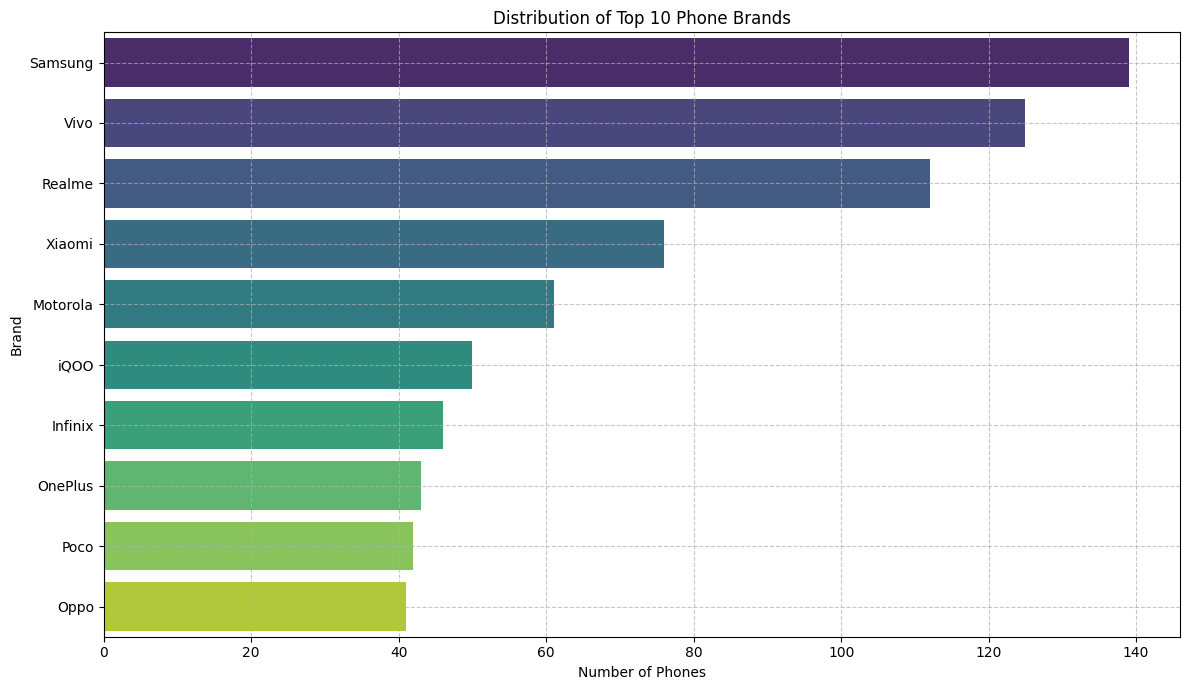

In [33]:
df['Brand'] = df['Name'].str.split().str[0]
brand_counts = df['Brand'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title('Distribution of Top 10 Phone Brands')
plt.xlabel('Number of Phones')
plt.ylabel('Brand')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## How's the price distribution by it's brand?

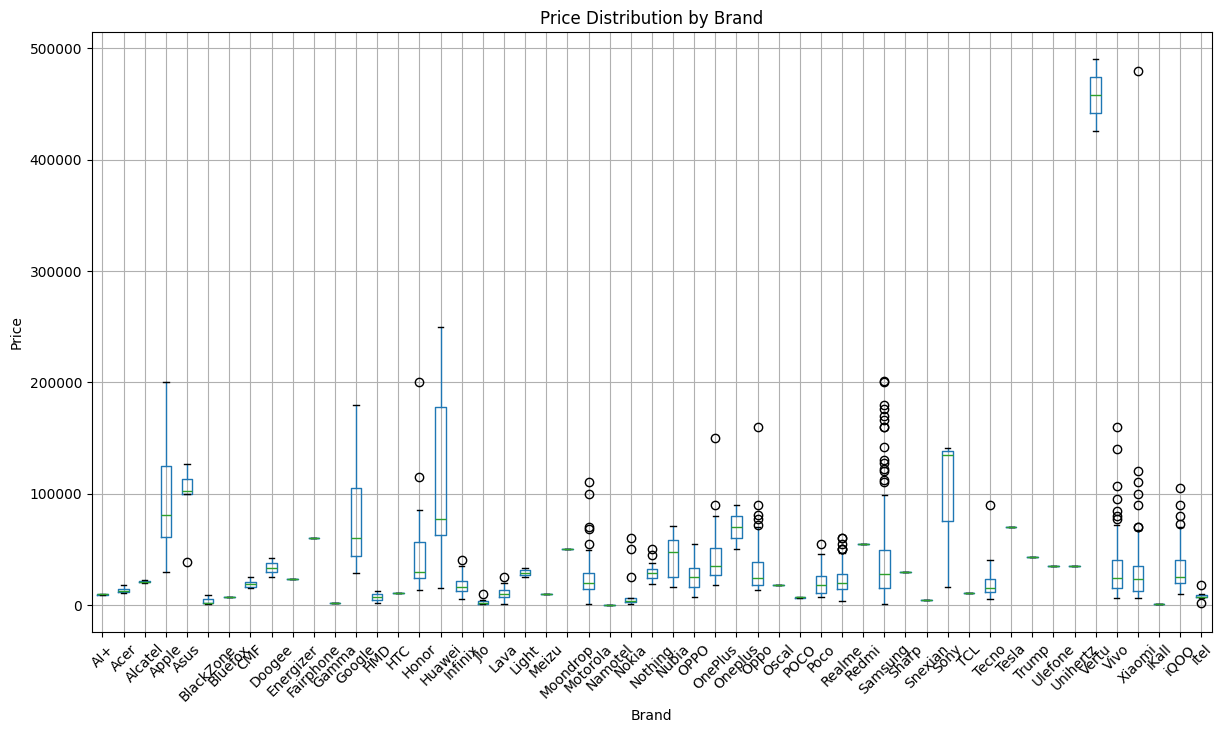

In [34]:
df.boxplot(column='price', by='Brand', figsize=(14, 8))
plt.title('Price Distribution by Brand')
plt.suptitle('')  
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Battery

In [35]:
df['battery'] = df['battery'].fillna('').str.lower()
df['battery_capacity_mah'] = df['battery'].str.extract(r'(\d+)\s*mah')
df['battery_watt'] = df['battery'].str.extract(r'(\d+\.?\d*)\s*w(?:att)?', expand=False)
df['has_fast_charging'] = df['battery'].str.contains('fast charging', na=False).astype(int)

df['batt_cap'] = pd.to_numeric(df['battery_capacity_mah'], errors='coerce')
df['batt_cap'].fillna(df['batt_cap'].median(), inplace=True)

df['battery_watt'] = pd.to_numeric(df['battery_watt'], errors='coerce')
df['battery_watt'].fillna(df['battery_watt'].median(), inplace=True)

df[['Name', 'battery_capacity_mah', 'battery_watt', 'has_fast_charging']].head(20)

,Name,battery_capacity_mah,battery_watt,has_fast_charging
0,OPPO Reno 14 Pro 5G,6200,80.0,1
1,OPPO Reno 14 5G,6000,80.0,1
2,Poco F7 5G,7550,90.0,1
3,Vivo X200 FE,6500,90.0,1
4,OPPO K13x 5G,6000,45.0,1
5,Vivo Y400 Pro 5G,5500,90.0,1
6,Xiaomi Redmi Turbo 4 Pro,7550,90.0,1
7,Vivo T4 Lite 5G,6000,15.0,1
8,Vivo S30 Pro Mini,6500,90.0,1
9,Samsung Galaxy M36 5G,5000,25.0,1


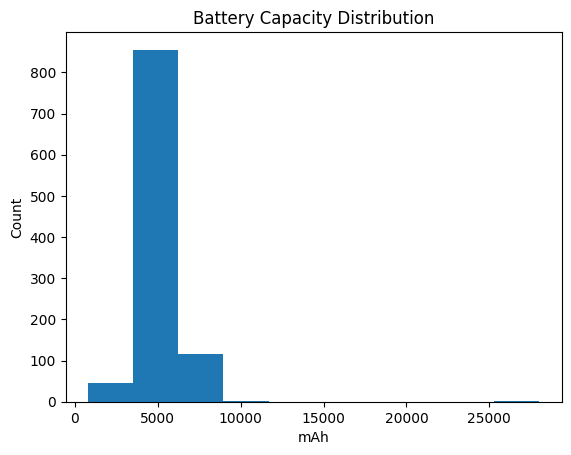

In [36]:
plt.hist(df['batt_cap'], bins=10)
plt.title('Battery Capacity Distribution')
plt.xlabel('mAh')
plt.ylabel('Count')
plt.show()

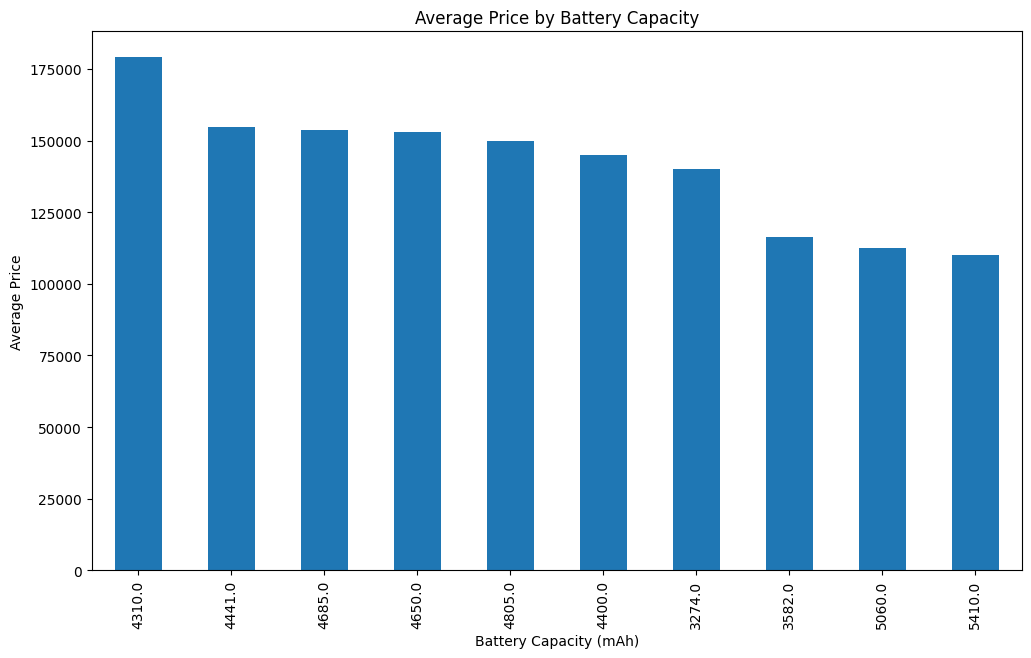

In [37]:
plt.figure(figsize=(12,7))
df.groupby('batt_cap')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Price by Battery Capacity")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Average Price")
plt.show()

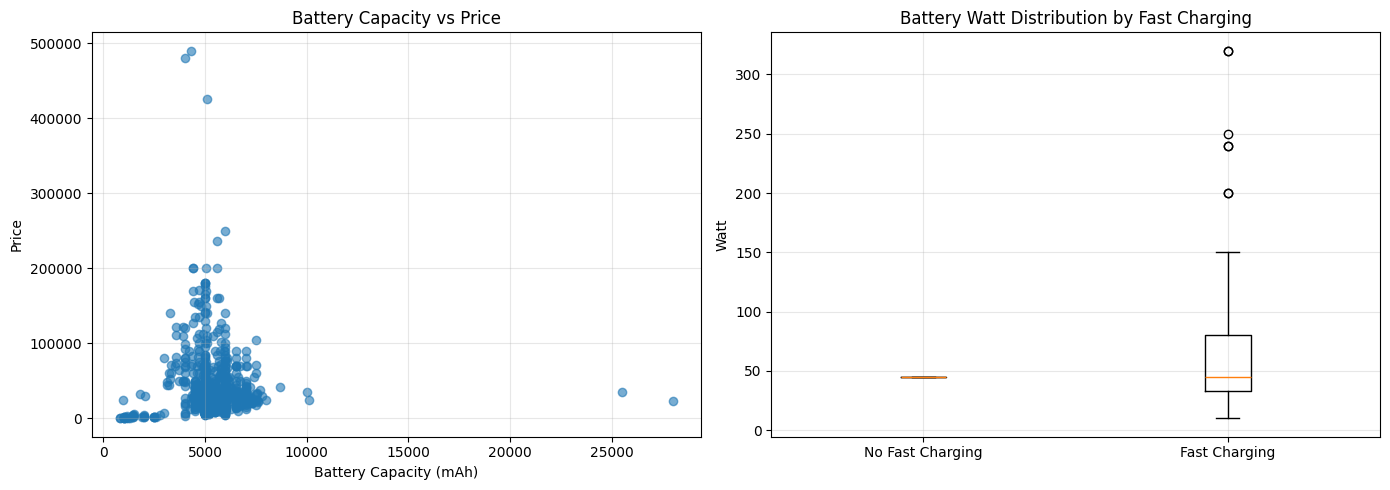

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['batt_cap'], df['price'], alpha=0.6)
axes[0].set_xlabel('Battery Capacity (mAh)')
axes[0].set_ylabel('Price')
axes[0].set_title('Battery Capacity vs Price')
axes[0].grid(True, alpha=0.3)

# dist fast charging
data_no_fc = df[df['has_fast_charging']==0]['battery_watt'].dropna()
data_with_fc = df[df['has_fast_charging']==1]['battery_watt'].dropna()

axes[1].boxplot([data_no_fc, data_with_fc], tick_labels=['No Fast Charging', 'Fast Charging'])
axes[1].set_ylabel('Watt')
axes[1].set_title('Battery Watt Distribution by Fast Charging')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## VERSION OS

In [39]:
import re

In [40]:
def extract_main_version(version_str):
    version_str = version_str.lower()
    match_android = re.search(r'android\s*v?(\d+)', version_str)
    match_ios = re.search(r'ios\s*v?(\d+)', version_str)
    
    if match_android: return 'Android ' + match_android.group(1)
    elif match_ios: return 'iOS ' + match_ios.group(1)
    else: return 'Other/Unknown Version'

df['Version_Main'] = df['version'].apply(extract_main_version)

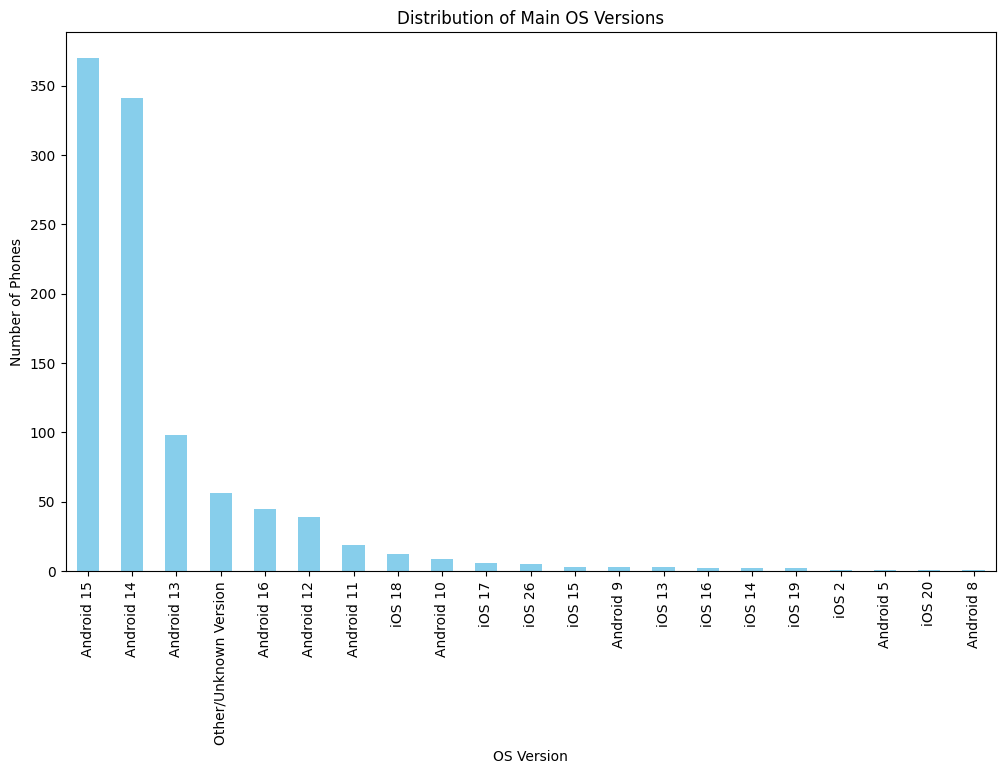

In [41]:
df['Version_Main'].value_counts().plot(kind='bar', figsize=(12,7), color='skyblue')
plt.title('Distribution of Main OS Versions')
plt.xlabel('OS Version')
plt.ylabel('Number of Phones')
plt.show()

## Feature Engineering

In [42]:
def extract_value_from_text(text, pattern):
    match = re.search(pattern, text, re.IGNORECASE)
    return float(match.group(1)) if match else np.nan

In [43]:
df['Display_Inches'] = df['display'].apply(lambda x: extract_value_from_text(x, r'(\d+\.?\d*)\s*(?:inch|inches|")'))
df['Camera_MP'] = df['camera'].apply(lambda x: extract_value_from_text(x, r'(\d+)\s*MP'))

In [44]:
for col in ['batt_cap', 'Display_Inches', 'Camera_MP', 'ram_gb', 'storage_gb']:
    median_val = df[col].median()
    if pd.isna(median_val):
        df[col].fillna(0, inplace=True)
    else:
        df[col].fillna(median_val, inplace=True)

In [45]:
for col in ['memoryExternal', 'Processor_Brand', 'Version_Main']:
    df[col].fillna('Unknown')

## Feature Selection

In [46]:
numerical_features = ['Spec Score', 'rating', 'batt_cap', 'Display_Inches', 'Camera_MP', 'ram_gb', 'storage_gb']
cat_features = ['tag', 'memoryExternal', 'Processor_Brand', 'Version_Main', 'Brand']
connectivity_features = ['sim_5g', 'sim_4g', 'has_nfc', 'is_dual_sim', 'has_wifi', 'has_ir_blaster', 'has_volte', 'has_vo5g', 'has_fast_charging']
target = 'price_log'

In [47]:
df[numerical_features].dtypes

Spec Score        float64
rating            float64
batt_cap          float64
Display_Inches    float64
Camera_MP         float64
ram_gb            float64
storage_gb        float64
dtype: object

In [48]:
df[cat_features].dtypes

tag                object
memoryExternal     object
Processor_Brand    object
Version_Main       object
Brand              object
dtype: object

In [49]:
df['sim_4g'] = df['sim_4g'].astype(int)
df['sim_5g'] = df['sim_5g'].astype(int)
df['has_nfc'] = df['has_nfc'].astype(int)
df['is_dual_sim'] = df['is_dual_sim'].astype(int)
df['has_wifi'] = df['has_wifi'].astype(int)
df['has_ir_blaster'] = df['has_ir_blaster'].astype(int)
df['has_volte'] = df['has_volte'].astype(int)
df['has_vo5g'] = df['has_vo5g'].astype(int)

In [50]:
df[connectivity_features].dtypes

sim_5g               int64
sim_4g               int64
has_nfc              int64
is_dual_sim          int64
has_wifi             int64
has_ir_blaster       int64
has_volte            int64
has_vo5g             int64
has_fast_charging    int64
dtype: object

In [51]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['Spec Score'] = pd.to_numeric(df['Spec Score'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [52]:
X = df[numerical_features+cat_features+connectivity_features]
y = df[target]

## Modelling

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (815, 21)
Shape X_test: (204, 21)
Shape y_train: (815,)
Shape y_test: (204,)


## Preprocessing Pipelines

In [56]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [57]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [58]:
bin_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_int', FunctionTransformer(lambda X: X.astype(int)))
])

In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, cat_features),
    ('bin', bin_pipeline, connectivity_features)
])

## Pipelines Model

In [60]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [61]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42))
])

## Training Model

In [62]:
def evaluate_model(pipeline, name, position):
    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    print(f"\n=== {name} ===")
    print("MAE :", mean_absolute_error(y_test_original, y_pred))
    print("MSE :", mean_squared_error(y_test_original, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred)))
    print("R2  :", r2_score(y_test_original, y_pred))

    plt.subplot(1, 2, position)
    sns.scatterplot(x=y_test_original, y=y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}")
    plt.plot(
        [y_test_original.min(), y_test_original.max()],
        [y_test_original.min(), y_test_original.max()],
        'r--'
    )
    plt.grid(True)
    

    return pipeline, y_pred



=== Linear Regression ===
MAE : 12641.359835458983
MSE : 1257506549.2073655
RMSE: 35461.33879603766
R2  : 0.3274954804323188

=== XGBoost Regressor ===
MAE : 7534.477740119485
MSE : 216546907.35805595
RMSE: 14715.532860146654
R2  : 0.8841924330426035

=== XGBoost Regressor ===
MAE : 7534.477740119485
MSE : 216546907.35805595
RMSE: 14715.532860146654
R2  : 0.8841924330426035


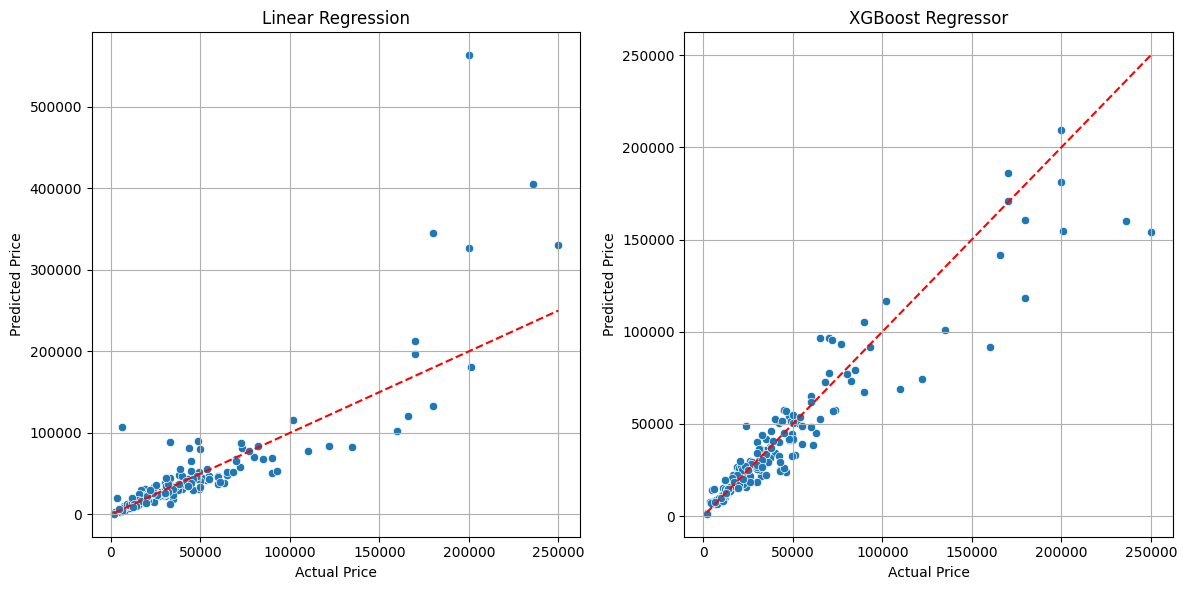

In [63]:
plt.figure(figsize=(12, 6)) 
model_lr, pred_lr = evaluate_model(pipeline_lr, "Linear Regression", position=1)
model_xgb, pred_xgb = evaluate_model(pipeline_xgb, "XGBoost Regressor", position=2)
plt.tight_layout()
plt.show()

## Predict Function

In [64]:
y_full_log = df[target]      
X_full = df[numerical_features + cat_features + connectivity_features]

final_model = pipeline_xgb.fit(X_full, y_full_log)


In [65]:
def predict_price(input_dict, model=final_model):
    X_new = pd.DataFrame([input_dict])
    y_pred_log = model.predict(X_new)[0]
    # Convert log price back to original price
    y_pred = np.expm1(y_pred_log)

    return float(y_pred)


In [66]:
INR_TO_IDR = 186.5
INR_TO_USD = 0.012

In [67]:
def ask_bool(prompt):
    ans = input(prompt + " (y/n): ").strip().lower()
    return 1 if ans in ['y', 'ya', 'yes'] else 0

In [68]:
def normalize_tag(raw_tag):
    raw = raw_tag.strip().lower()
    if raw.startswith('launch'):
        return 'launched'
    if raw.startswith('rum'):
        return 'rumored'
    if raw.startswith('up'):
        return 'upcoming'
    return 'launched'

In [69]:
def get_user_phone_specs():
    print("Please enter the phone specifications for price prediction:\n")

    brand = input("Brand (e.g., Samsung, Xiaomi, Realme): ").strip()
    spec_score = float(input("Spec Score (0–100, general performance score): "))
    rating = float(input("User rating (e.g., 4.3 — if unsure, use 4.0): "))

    batt_cap = float(input("Battery capacity (mAh), e.g., 5000: "))
    display_inches = float(input("Display size (inches), e.g., 6.5: "))
    camera_mp = float(input("Main camera resolution (MP), e.g., 50: "))

    ram_gb = float(input("RAM (GB), e.g., 8: "))
    storage_gb = float(input("Internal storage (GB), e.g., 256: "))

    tag_input = input("Launch status (launched / rumored / upcoming): ")
    tag = normalize_tag(tag_input)
    memory_external = input("Does it support microSD? (Yes/No): ").strip() or "Unknown"

    processor_brand = input("Processor brand (e.g., Snapdragon, MediaTek): ").strip()
    version_main = input("Main OS version (e.g., Android 14): ").strip()

    print("\nConnectivity features (answer y/n):")
    sim_5g = ask_bool("Supports 5G?")
    sim_4g = ask_bool("Supports 4G?")
    has_nfc = ask_bool("Has NFC?")
    is_dual_sim = ask_bool("Dual SIM?")
    has_ir_blaster = ask_bool("Has IR blaster?")
    has_fast_charging = ask_bool("Supports fast charging?")
    has_volte = ask_bool("Supports VoLTE?")
    has_vo5g = ask_bool("Supports Vo5G / VoNR?")
    has_wifi = ask_bool("Has WiFi?")

    specs = {
        'Brand': brand,
        'Spec Score': spec_score,
        'rating': rating,
        'batt_cap': batt_cap,
        'Display_Inches': display_inches,
        'Camera_MP': camera_mp,
        'ram_gb': ram_gb,
        'storage_gb': storage_gb,
        'tag': tag,
        'memoryExternal': memory_external,
        'Processor_Brand': processor_brand,
        'Version_Main': version_main,
        'sim_5g': sim_5g,
        'sim_4g': sim_4g,
        'has_nfc': has_nfc,
        'is_dual_sim': is_dual_sim,
        'has_ir_blaster': has_ir_blaster,
        'has_fast_charging': has_fast_charging,
        'has_volte': has_volte,
        'has_vo5g': has_vo5g,
        'has_wifi': has_wifi,
    }

    return specs


In [70]:
def run_price_prediction():
    specs = get_user_phone_specs()
    price_inr = predict_price(specs)
    price_usd = price_inr * INR_TO_USD
    price_idr = price_inr * INR_TO_IDR

    print("\n=== Estimated Phone Price ===")
    print(f"INR : ₹{price_inr:,.0f}")
    print(f"USD : ${price_usd:,.2f}")
    print(f"IDR : Rp {price_idr:,.0f}")


In [72]:
run_price_prediction()

Please enter the phone specifications for price prediction:


Connectivity features (answer y/n):

Connectivity features (answer y/n):

=== Estimated Phone Price ===
INR : ₹79,924
USD : $959.09
IDR : Rp 14,905,814

=== Estimated Phone Price ===
INR : ₹79,924
USD : $959.09
IDR : Rp 14,905,814
